In [5]:
from datetime import datetime
from concurrent import futures
import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))
if __name__ == '__main__':
	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
	""" list of s_anp_p companies """
	s_and_p = ['GC=F']
		
	bad_names =[] #to keep track of failed queries
	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel
		as opposed to sequentially """
	#set the maximum thread number
	max_workers = 50
	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)
	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')
	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

GC=F
getSandP_threaded.py
The threaded script took 0 minutes and 1 seconds to run.


In [7]:
df = pd.read_csv('GC=F_data.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-10,1354.199951,1344.300049,1344.800049,1344.300049,110.0,1344.300049,GC=F
1,2016-08-11,1350.400024,1334.800049,1341.599976,1342.500000,666.0,1342.500000,GC=F
2,2016-08-12,1351.800049,1333.199951,1336.800049,1335.800049,113.0,1335.800049,GC=F
3,2016-08-15,1340.599976,1333.599976,1336.500000,1340.300049,62.0,1340.300049,GC=F
4,2016-08-16,1355.000000,1341.000000,1342.199951,1350.500000,338.0,1350.500000,GC=F
...,...,...,...,...,...,...,...,...
1241,2021-08-04,1831.300049,1806.300049,1809.300049,1810.500000,2860.0,1810.500000,GC=F
1242,2021-08-05,1813.699951,1796.000000,1810.800049,1805.099976,588.0,1805.099976,GC=F
1243,2021-08-06,1800.099976,1758.400024,1799.800049,1760.000000,859.0,1760.000000,GC=F
1244,2021-08-09,1753.800049,1692.599976,1753.500000,1723.400024,859.0,1723.400024,GC=F


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

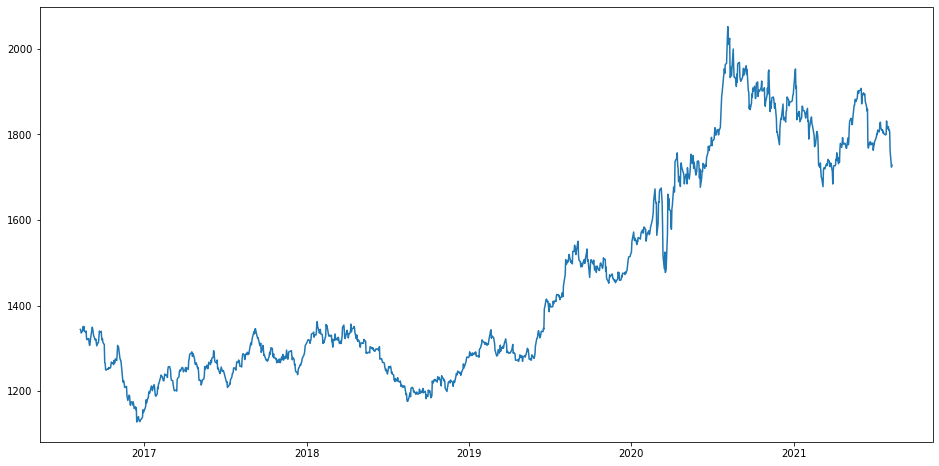

In [9]:
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history');

In [10]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [11]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [23]:
cutoff = round(df.shape[0]*0.90)
cutoff

1121

In [24]:
train = df[:cutoff]
valid = df[cutoff:]

In [25]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [26]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
75.67352197957968


<ipython-input-27-7a06f5b7bbb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-27-7a06f5b7bbb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


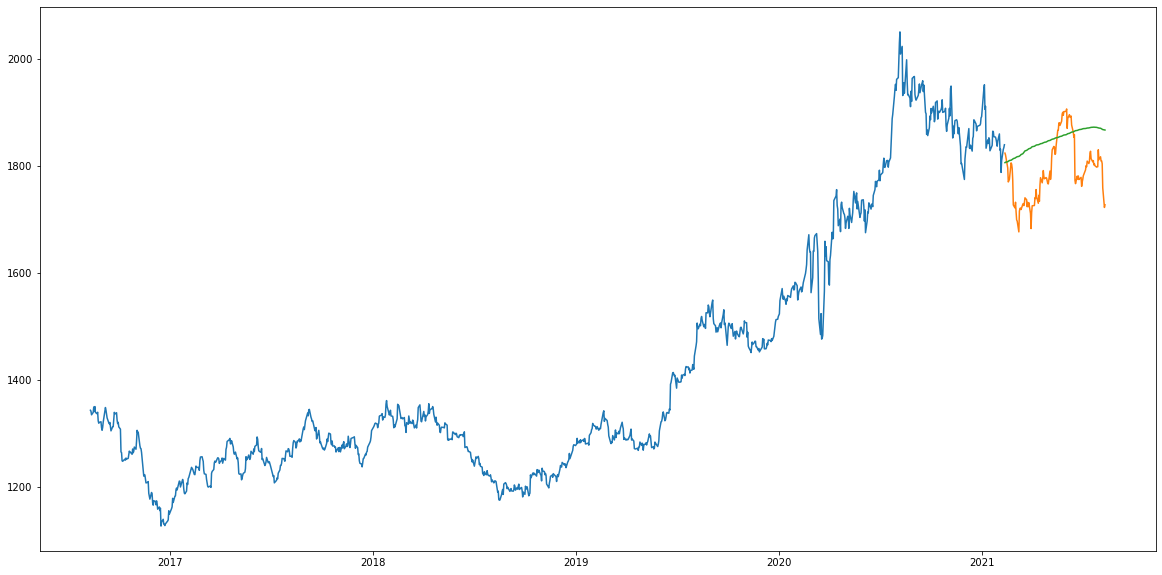

In [27]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']]);

In [29]:
train

,Date,Close
0,2016-08-10 00:00:00,1344.300049
1,2016-08-11 00:00:00,1342.5
2,2016-08-12 00:00:00,1335.800049
3,2016-08-15 00:00:00,1340.300049
4,2016-08-16 00:00:00,1350.5
...,...,...
1116,2021-02-04 00:00:00,1788.900024
1117,2021-02-05 00:00:00,1810.900024
1118,2021-02-08 00:00:00,1831.900024
1119,2021-02-09 00:00:00,1835.300049


In [28]:
train = new_data[:cutoff]
valid = new_data[cutoff:]

X_train = train.drop('Close', axis=1)
y_train = train['Close']
X_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [31]:
from pmdarima.arima import auto_arima

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=125)
forecast = pd.DataFrame(forecast, index=valid.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9734.704, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9475.816, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=9733.788, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9359.083, Time=1.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9358.773, Time=0.92 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=9476.165, Time=0.30 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.14 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9359.231, Time=1.39 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=9360.191, Time=2.08 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=9360.7

In [32]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

94.9905712172103

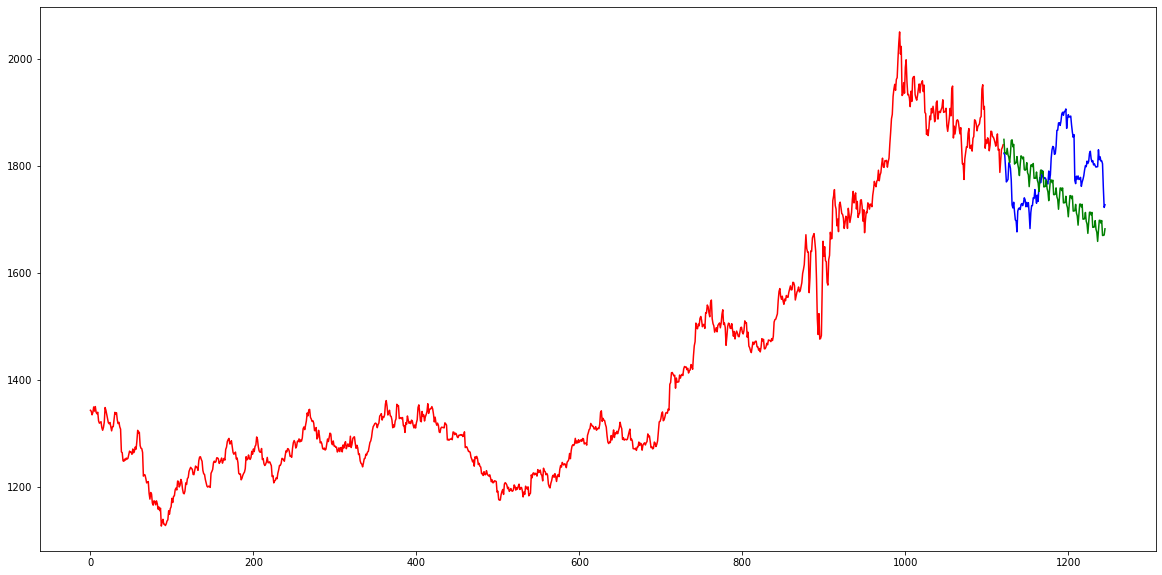

In [33]:
plt.plot(train['Close'], color='r')
plt.plot(valid['Close'], color='b')
plt.plot(forecast['Prediction'], color='g')